In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
TOURNEY_NUMBER = 6

In [24]:
def get_tourney_data(tourney_number):

  df = pd.read_csv(f'tourney_data/championship_{tourney_number}.csv')

  # inserting new column for Game ID
  df.insert(0, 'Game ID', np.arange(1, df.shape[0]+1))

  for col in df.columns:
    # optional block if you have bidder info
    if col == 'Bidder':
        continue
    df[col] = df[col].astype(int)

  return df

df = get_tourney_data(TOURNEY_NUMBER)
df

,Game ID,Abhi,Akash,Ani,Naati,Nats,Prateek
0,1,410,410,0,0,0,410
1,2,0,380,0,380,0,400
2,3,410,0,0,390,0,390
3,4,0,380,400,0,380,0
4,5,400,0,400,0,0,400
5,6,0,410,0,0,410,410
6,7,0,430,0,410,0,410
7,8,370,0,0,0,390,370
8,9,390,0,390,0,390,0
9,10,370,0,370,0,0,370


In [25]:
def get_players(df):
  players = list(filter(lambda player: player != 'Bidder', list(df.columns[1:])))
  return players

players = get_players(df)
players

['Abhi', 'Akash', 'Ani', 'Naati', 'Nats', 'Prateek']

In [26]:
def get_game_data_as_timeseries(df):
  # Load the data from the CSV file
  game_data = df.copy(deep=True)
  players = get_players(df)

  for player in players:
    game_data[f'CumSum_{player}'] = game_data[player].cumsum()
    game_data[f'MovingAvgPoints_{player}'] = game_data[f'CumSum_{player}']/game_data['Game ID']
    game_data[f'{player}_Won'] = game_data[f'{player}'].apply(lambda x: 1 if x > 0 else 0)
    game_data[f'NumGamesWon_{player}'] = game_data[f'{player}_Won'].cumsum()
    game_data[f'WinRatio_{player}'] = game_data[f'NumGamesWon_{player}']/game_data['Game ID']

  return game_data

game_data = get_game_data_as_timeseries(df)
game_data

,Game ID,Abhi,Akash,Ani,Naati,Nats,Prateek,CumSum_Abhi,MovingAvgPoints_Abhi,Abhi_Won,...,CumSum_Nats,MovingAvgPoints_Nats,Nats_Won,NumGamesWon_Nats,WinRatio_Nats,CumSum_Prateek,MovingAvgPoints_Prateek,Prateek_Won,NumGamesWon_Prateek,WinRatio_Prateek
0,1,410,410,0,0,0,410,410,410.000000,1,...,0,0.000000,0,0,0.000000,410,410.000000,1,1,1.000000
1,2,0,380,0,380,0,400,410,205.000000,0,...,0,0.000000,0,0,0.000000,810,405.000000,1,2,1.000000
2,3,410,0,0,390,0,390,820,273.333333,1,...,0,0.000000,0,0,0.000000,1200,400.000000,1,3,1.000000
3,4,0,380,400,0,380,0,820,205.000000,0,...,380,95.000000,1,1,0.250000,1200,300.000000,0,3,0.750000
4,5,400,0,400,0,0,400,1220,244.000000,1,...,380,76.000000,0,1,0.200000,1600,320.000000,1,4,0.800000
5,6,0,410,0,0,410,410,1220,203.333333,0,...,790,131.666667,1,2,0.333333,2010,335.000000,1,5,0.833333
6,7,0,430,0,410,0,410,1220,174.285714,0,...,790,112.857143,0,2,0.285714,2420,345.714286,1,6,0.857143
7,8,370,0,0,0,390,370,1590,198.750000,1,...,1180,147.500000,1,3,0.375000,2790,348.750000,1,7,0.875000
8,9,390,0,390,0,390,0,1980,220.000000,1,...,1570,174.444444,1,4,0.444444,2790,310.000000,0,7,0.777778
9,10,370,0,370,0,0,370,2350,235.000000,1,...,1570,157.000000,0,4,0.400000,3160,316.000000,1,8,0.800000


# Part 1 - Crunching player stats

In [27]:
def get_player_stats(df):

  player_stats = df.melt(id_vars=['Game ID'], var_name='Player', value_name='Points')
  player_stats['Result'] = player_stats['Points'].apply(lambda x: 'Win' if x > 0 else 'Lose')
  # Calculate wins, losses, and win ratio
  player_stats['Wins'] = player_stats['Result'].apply(lambda x: 1 if x == 'Win' else 0)
  player_stats['Losses'] = player_stats['Result'].apply(lambda x: 1 if x == 'Lose' else 0)

  player_stats = player_stats.groupby('Player').agg(
    Wins=pd.NamedAgg(column='Wins', aggfunc='sum'),
    # Losses=pd.NamedAgg(column='Losses', aggfunc='sum'),
    TotalGames=pd.NamedAgg(column='Game ID', aggfunc='count'),
    AvgPoints=pd.NamedAgg(column='Points', aggfunc='mean'),
    TotalPoints=pd.NamedAgg(column='Points', aggfunc='sum'),
  ).reset_index()

  player_stats['WinRatio'] = player_stats['Wins'] / (player_stats['TotalGames'])
  player_stats = player_stats.sort_values(by=['TotalPoints', 'Wins'], ascending = False)
  return player_stats

player_stats = get_player_stats(df)
# player_stats = player_stats.style.background_gradient()
player_stats

,Player,Wins,TotalGames,AvgPoints,TotalPoints,WinRatio
1,Akash,31,44,286.136364,12590,0.704545
5,Prateek,29,44,260.227273,11450,0.659091
4,Nats,24,44,220.454545,9700,0.545455
0,Abhi,19,44,172.954545,7610,0.431818
3,Naati,19,44,170.681818,7510,0.431818
2,Ani,17,44,156.590909,6890,0.386364


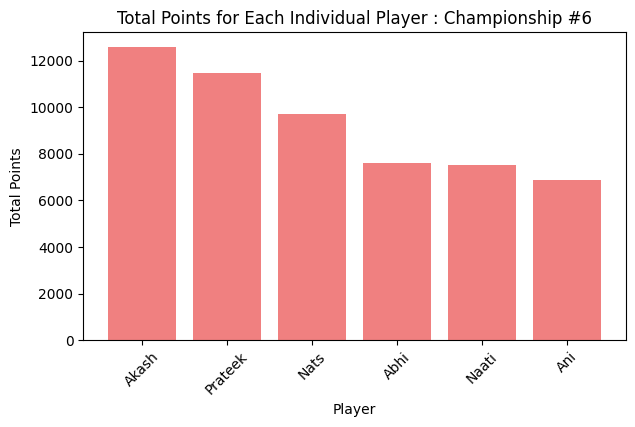

In [28]:
# Display a bar chart
plt.figure(figsize=(7, 4))
plt.bar(player_stats['Player'], player_stats['TotalPoints'], color='lightcoral')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.title(f'Total Points for Each Individual Player : Championship #{tourney_number}')
plt.xticks(rotation=45)
plt.show()


# Part 2 - Seeing performance graph over the tournament

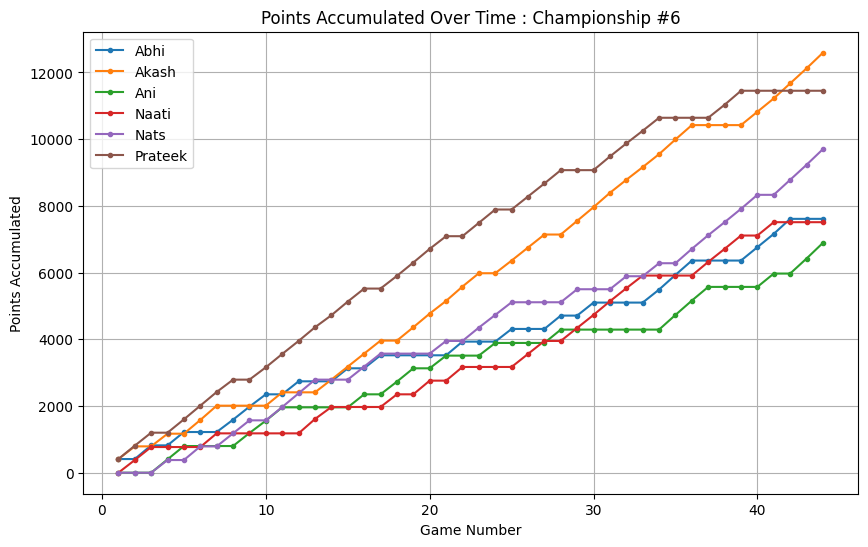

In [29]:
def plot_perf_over_tourney(game_data, players):

  # Plot the points accumulated over time
  plt.figure(figsize=(10, 6))

  # Calculate cumulative points over time
  for player in players:
    plt.plot(game_data['Game ID'], game_data[f'CumSum_{player}'], marker='.', linestyle='-', label=player)


  plt.legend()
  plt.xlabel('Game Number')
  plt.ylabel('Points Accumulated')
  plt.title(f'Points Accumulated Over Time : Championship #{tourney_number}')
  plt.grid(True)
  plt.show()

plot_perf_over_tourney(game_data, players)


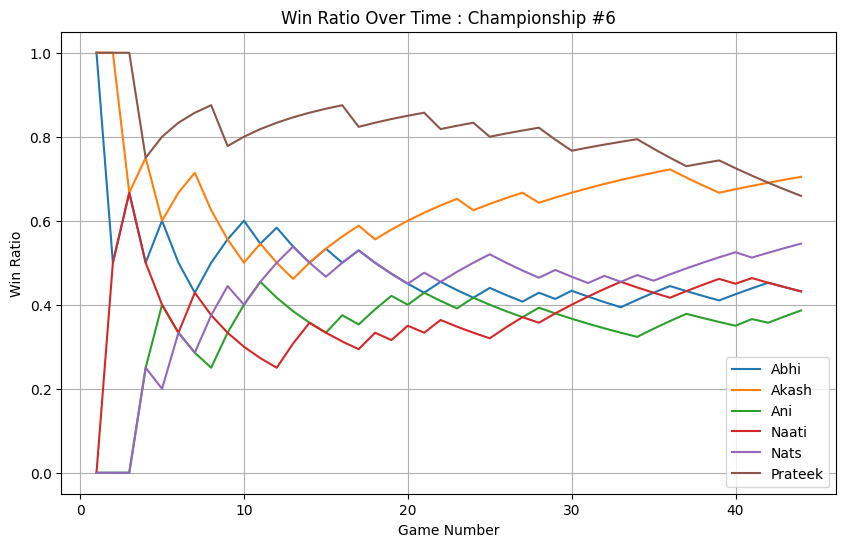

In [30]:
def plot_perf_over_tourney(game_data, players):

  # Plot the points accumulated over time
  plt.figure(figsize=(10, 6))

  # Calculate cumulative points over time
  for player in players:
    plt.plot(game_data['Game ID'], game_data[f'WinRatio_{player}'], linestyle='-', label=player)


  plt.legend()
  plt.xlabel('Game Number')
  plt.ylabel('Win Ratio')
  plt.title(f'Win Ratio Over Time : Championship #{tourney_number}')
  plt.grid(True)
  plt.show()


plot_perf_over_tourney(game_data, players)

# Part 3 - Pair-wise stats

In [31]:
def get_pairwise_stats(df):

  # Calculate statistics for each pair of players when they are on the same team
  same_team_stats = df.melt(id_vars=['Game ID'], var_name='Player', value_name='Points')
  same_team_stats['Result'] = same_team_stats['Points'].apply(lambda x: 'Win' if x > 0 else 'Lose')

  same_team_stats['join_id'] = same_team_stats['Points'].apply(lambda x: 'Win' if x > 0 else 'Lose')

  # computing pairwise by JOIN
  result = same_team_stats.merge(same_team_stats, left_on=['Game ID', 'Result'], right_on=['Game ID', 'Result'], how='inner')
  result = result[result['Player_x'] != result['Player_y']]
  result = result[result['Player_x'] < result['Player_y']]
  result['Wins'] = result['Result'].apply(lambda x: 1 if x == 'Win' else 0)
  result['Losses'] = result['Result'].apply(lambda x: 1 if x == 'Lose' else 0)
  result['Points'] = result[['Points_x','Points_y']].min(axis=1)

  result = result.sort_values(by=['Game ID'])
  result = result.reset_index()

  result = result.groupby(['Player_x', 'Player_y']).agg(
    Wins=pd.NamedAgg(column='Wins', aggfunc='sum'),
    Losses=pd.NamedAgg(column='Losses', aggfunc='sum'),
    TotalGames=pd.NamedAgg(column='Game ID', aggfunc='count'),
    AvgPoints=pd.NamedAgg(column='Points', aggfunc='mean'),
  ).reset_index()

  result['WinRatio'] = result['Wins'] / (result['Wins'] + result['Losses'])
  result = result.sort_values(by=['WinRatio'], ascending = False)

  return result

get_pairwise_stats(df)

,Player_x,Player_y,Wins,Losses,TotalGames,AvgPoints,WinRatio
8,Akash,Prateek,18,2,20,354.500000,0.900000
14,Nats,Prateek,13,4,17,300.000000,0.764706
7,Akash,Nats,16,5,21,309.523810,0.761905
0,Abhi,Akash,12,6,18,271.111111,0.666667
6,Akash,Naati,13,7,20,255.500000,0.650000
4,Abhi,Prateek,9,5,14,250.714286,0.642857
5,Akash,Ani,10,6,16,258.750000,0.625000
13,Naati,Prateek,14,10,24,228.750000,0.583333
11,Ani,Prateek,9,7,16,218.750000,0.562500
3,Abhi,Nats,9,10,19,188.947368,0.473684


# Part 4 - Trio stats

In [32]:
def get_tri_stats(df):

  # Calculate statistics for each pair of players when they are on the same team
  same_team_stats = df.melt(id_vars=['Game ID'], var_name='Player', value_name='Points')
  same_team_stats['Result'] = same_team_stats['Points'].apply(lambda x: 'Win' if x > 0 else 'Lose')
  same_team_stats['join_id'] = same_team_stats['Points'].apply(lambda x: 'Win' if x > 0 else 'Lose')

  # computing pairwise by JOIN
  result = same_team_stats.merge(same_team_stats, left_on=['Game ID', 'Result'], right_on=['Game ID', 'Result'], how='inner')
  result = result.merge(same_team_stats, left_on=['Game ID', 'Result'], right_on=['Game ID', 'Result'], how='inner')
  result = result.rename(columns={"Player": "Player_z", "Points": "Points_z"})

  # filtering out bad values
  result = result[result['Player_x'] != result['Player_y']]
  result = result[result['Player_y'] != result['Player_z']]
  result = result[result['Player_x'] != result['Player_z']]

  result = result[result['Player_x'] < result['Player_y']]
  result = result[result['Player_y'] < result['Player_z']]
  result = result[result['Player_x'] < result['Player_z']]

  result['Wins'] = result['Result'].apply(lambda x: 1 if x == 'Win' else 0)
  result['Losses'] = result['Result'].apply(lambda x: 1 if x == 'Lose' else 0)
  result['Points'] = result[['Points_x','Points_y', 'Points_z']].min(axis=1)

  result = result.sort_values(by=['Game ID'])
  result = result.reset_index()

  result = result.groupby(['Player_x', 'Player_y', 'Player_z']).agg(
    Wins=pd.NamedAgg(column='Wins', aggfunc='sum'),
    Losses=pd.NamedAgg(column='Losses', aggfunc='sum'),
    TotalGames=pd.NamedAgg(column='Game ID', aggfunc='count'),
    AvgPoints=pd.NamedAgg(column='Points', aggfunc='mean'),
  ).reset_index()

  result['WinRatio'] = result['Wins'] / (result['Wins'] + result['Losses'])
  result = result.sort_values(by=['WinRatio'], ascending = False)

  return result

get_tri_stats(df)

,Player_x,Player_y,Player_z,Wins,Losses,TotalGames,AvgPoints,WinRatio
15,Akash,Nats,Prateek,7,0,7,394.285714,1.000000
12,Akash,Ani,Prateek,4,0,4,392.500000,1.000000
9,Abhi,Nats,Prateek,3,0,3,383.333333,1.000000
14,Akash,Naati,Prateek,9,1,10,352.000000,0.900000
11,Akash,Ani,Nats,7,1,8,362.500000,0.875000
2,Abhi,Akash,Nats,6,1,7,348.571429,0.857143
19,Naati,Nats,Prateek,4,1,5,318.000000,0.800000
3,Abhi,Akash,Prateek,3,1,4,297.500000,0.750000
6,Abhi,Ani,Prateek,3,1,4,292.500000,0.750000
1,Abhi,Akash,Naati,3,1,4,300.000000,0.750000


# Part 5 - #games bid and won

In [33]:
def bid_and_won(df):
  players = list(df.columns[1:])
  bid_and_win = {}
  for player in players:
    bid_and_win[player] = 0

  for index, row in df.iterrows():
      x = row[1:]
      bidder = None
      if(x.sum()%x.max()!=0):
        for player in players:
          if x[player] == x.max():
            bidder = player
            bid_and_win[player] += 1

  res = pd.DataFrame(bid_and_win.items(), columns=['Player', 'Bid and Won'])
  res = res.sort_values(by=['Bid and Won'], ascending = False)
  return res
bid_and_won(df)

,Player,Bid and Won
1,Akash,6
5,Prateek,4
4,Nats,3
0,Abhi,1
2,Ani,1
3,Naati,1


# Part 6 - Performance over the tournament

In [34]:
game_data

,Game ID,Abhi,Akash,Ani,Naati,Nats,Prateek,CumSum_Abhi,MovingAvgPoints_Abhi,Abhi_Won,...,CumSum_Nats,MovingAvgPoints_Nats,Nats_Won,NumGamesWon_Nats,WinRatio_Nats,CumSum_Prateek,MovingAvgPoints_Prateek,Prateek_Won,NumGamesWon_Prateek,WinRatio_Prateek
0,1,410,410,0,0,0,410,410,410.000000,1,...,0,0.000000,0,0,0.000000,410,410.000000,1,1,1.000000
1,2,0,380,0,380,0,400,410,205.000000,0,...,0,0.000000,0,0,0.000000,810,405.000000,1,2,1.000000
2,3,410,0,0,390,0,390,820,273.333333,1,...,0,0.000000,0,0,0.000000,1200,400.000000,1,3,1.000000
3,4,0,380,400,0,380,0,820,205.000000,0,...,380,95.000000,1,1,0.250000,1200,300.000000,0,3,0.750000
4,5,400,0,400,0,0,400,1220,244.000000,1,...,380,76.000000,0,1,0.200000,1600,320.000000,1,4,0.800000
5,6,0,410,0,0,410,410,1220,203.333333,0,...,790,131.666667,1,2,0.333333,2010,335.000000,1,5,0.833333
6,7,0,430,0,410,0,410,1220,174.285714,0,...,790,112.857143,0,2,0.285714,2420,345.714286,1,6,0.857143
7,8,370,0,0,0,390,370,1590,198.750000,1,...,1180,147.500000,1,3,0.375000,2790,348.750000,1,7,0.875000
8,9,390,0,390,0,390,0,1980,220.000000,1,...,1570,174.444444,1,4,0.444444,2790,310.000000,0,7,0.777778
9,10,370,0,370,0,0,370,2350,235.000000,1,...,1570,157.000000,0,4,0.400000,3160,316.000000,1,8,0.800000


In [35]:
for player in players:
    game_data[f'{player}_Won'] = game_data[f'{player}'].apply(lambda x: 1 if x > 0 else 0)
    game_data[f'{player}_Lost'] = game_data[f'{player}'].apply(lambda x: 1 if x == 0 else 0)
    game_data[f'NumGamesWon_{player}'] = game_data[f'{player}_Won'].cumsum()
    game_data[f'WinRatio_{player}'] = game_data[f'NumGamesWon_{player}']/game_data['Game ID']

game_data

,Game ID,Abhi,Akash,Ani,Naati,Nats,Prateek,CumSum_Abhi,MovingAvgPoints_Abhi,Abhi_Won,...,MovingAvgPoints_Prateek,Prateek_Won,NumGamesWon_Prateek,WinRatio_Prateek,Abhi_Lost,Akash_Lost,Ani_Lost,Naati_Lost,Nats_Lost,Prateek_Lost
0,1,410,410,0,0,0,410,410,410.000000,1,...,410.000000,1,1,1.000000,0,0,1,1,1,0
1,2,0,380,0,380,0,400,410,205.000000,0,...,405.000000,1,2,1.000000,1,0,1,0,1,0
2,3,410,0,0,390,0,390,820,273.333333,1,...,400.000000,1,3,1.000000,0,1,1,0,1,0
3,4,0,380,400,0,380,0,820,205.000000,0,...,300.000000,0,3,0.750000,1,0,0,1,0,1
4,5,400,0,400,0,0,400,1220,244.000000,1,...,320.000000,1,4,0.800000,0,1,0,1,1,0
5,6,0,410,0,0,410,410,1220,203.333333,0,...,335.000000,1,5,0.833333,1,0,1,1,0,0
6,7,0,430,0,410,0,410,1220,174.285714,0,...,345.714286,1,6,0.857143,1,0,1,0,1,0
7,8,370,0,0,0,390,370,1590,198.750000,1,...,348.750000,1,7,0.875000,0,1,1,1,0,0
8,9,390,0,390,0,390,0,1980,220.000000,1,...,310.000000,0,7,0.777778,0,1,0,1,0,1
9,10,370,0,370,0,0,370,2350,235.000000,1,...,316.000000,1,8,0.800000,0,1,0,1,1,0


In [36]:
import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()

ModuleNotFoundError: No module named 'calmap'